# **Task HD1** (Due May 22, 11 AM)
## Analyzing YouTube Video Data from News Publishers

##### This task focuses on analyzing YouTube videos about a news topic (e.g., Covid-19) published by at least 4 English news publishers (e.g., BBC, Fox News, ...) from a start date to an end date. You will need to specify the news topic and the list of keywords to search for the videos about that topic on YouTube. Also, you will need to extract the channel IDs of the news publishers using the function get_channel_info() given to you in the attached "collect.ipynb" file. All settings need to be specified in Section B (Settings) of "collect.ipynb" and also copied into Section B (Settings) of this jupyter notebook (HD1.ipynb). Please note the terms "News Publisher" and "Cahnnel" have been used interchangably in this task (each news publisher has a channel - if a news publisher has more than one channels on YouTube, pick any and state that in your TaskCompletionReport). The following instructions convey important information about the task. Please **read them carefully** and complete the task. If you need any clarification please    
<img src="youtube.png" alt="SIT112 Avocado!" width="1800" height="200">

### A. Instructions

#### Attachments
* directions.pdf
* collect.ipynb
* credentials-sample.ini
* video-presentation-guideline.pdf

#### Get Started 
0. Please watch [this video](https://www.youtube.com/watch?v=N9CT6Ggh0oE) about Sentiment Analysis.
1. Rename the "credentials-sample.ini" file to "credentials.ini" and follow the instructions. 
2. Creat your YouTube API key and assign it to developer_key in the credentials.ini file. You will need the YouTube API key to get access to the YouTube API (collect the data). See the following video: https://youtu.be/N18czV5tj5o (the video is not up to date; the instrucitons might be sighly different. You can view the following link for more details: https://developers.google.com/youtube/v3/getting-started). Please note Projects that enable the YouTube Data API have a default quota allocation of 10,000 units per day; to make an efficient use of your quota, please avoid multiple excecutions of the "collect.ipynb" file: https://developers.google.com/youtube/v3/guides/quota_and_compliance_audits. 
3. To work with the YouTube API (send queries), you need to install Google API Python Client using: "conda install google-api-python-client" 
#### Specify the news topic and news publishers (channels)
4. Choose a news topic (e.g., Covid-19) and a list of keywords to be used for finding videos about that topic. You can extract the keywords by looking at some sample video titles. 
5. Choose at least 4 popular English news publishers (e.g., BBC, Fox News).
6. Extract, manually, the video IDs of sample videos from different news publishers (channels). You can do so by clicking on the share button for each video. 
7. Extract the Channel IDs of the videos using the get_channel_info() function in collect.ipynb 
#### Collect the Videos and Comments using "collect.ipynb" 
8. Specify the Channel IDs and names in the Settings section of the attached collect.ipynb file (CHANNELS = {...})
9. Specify the list keywords in the Settings section of the attached collect.ipynb file (KEYWORDS = [...])
10. Specify the START_DATE and END_DATE in the Settings section of the attached collect.ipynb file
11. Specify the MAX_VIDEOS such that you can extract **at least 20 videos per news publisher (channel)**. Make sure for your specified topic, **at least 300 comments per news publisher (channel)** can be collected. Please note some publishers might have disabled comments.
12. Please **do not make any changes to the "collect.ipynb" file**
13. Execute the collect.ipynb file to collect the videos (will be stored in videos.csv) and the comments on those videos (will be stored in comments.csv).
#### Complete the Task
14. <font color='red'> Choose only 1 question from Section E</font>, and answer it based on the hints. Please note, for each question, you must **briefly discuss your observations** based on the results.
15. Please note **there is no unique solution** for most questions; if you need to make any assumptions, **state your assumptions** in the comments and in your TaskCompletionReport and answer the question accordingly. Please also note, **if something has not been clearly stated in a question (e.g., the type of visualization, etc) it means you are allowed to make your own choice**. 
16. **Read the attached "video-presentation-guideline.pdf"** carefully and record a video clip (based on video-presentation-guideline.pdf) that presents your completed task. Upload the video on a video repository such as YouTube (or any other preferred repository) and provide the link in the TaskCompletionReport. 
17. Complete the TaskCompletionReport form.

#### Submit the Task
18. Please make sure you have copied the settings from collect.ipynb into your solution file (HD1.ipynb), under section B (settings).  
19. Please make sure you have executed and saved all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
20. Please make sure you have included the link to the dataset(s) in your TaskCompletionReport.
21. Please make sure you have included the link to the video rcording of your presentation in your TaskCompletionReport. 
22. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution file (HD1.ipynb) as an "ipynb" file (do not zip/combine them). Please do not include "collect.ipynb" in your submission. 

#### <font color ='red'>Attend the Interview </font>
23. Please attend your interview - on week 11 - during the workshop you are enrolled in. 
24. Please make sure you have submitted your task via OnTrack before the interview; you can still resubmit by the end of Week 12 if any changes are needed. 
25. During the interview, you will be asked questions about your submission and might be directed to make changes to your code and explain their impacts on the results/observations. 

Good luck :)

### B. Settings
Copy your settings from Section B of the "collect.ipynb" file below (as Python comments).

In [1]:
# VIDEOS_FILE = 
# COMMENTS_FILE = 
# CREDENTIALS_FILE = 
# START_DATE = 
# END_DATE = 
# KEYWORDS =
# CHANNELS =
# MAX_VIDEOS =  
# QUERY= 

### C. Imports
You need to import the following libraries. Install the libraries using "conda install ... or pip install ..." if they have not been installed on your machine. For example you can install google api python client by executing "conda install google-api-python-client"

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from datetime import datetime
import os
from configparser import ConfigParser
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from langdetect import detect
import langdetect
from textblob import TextBlob
import calendar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from prettytable import PrettyTable
from tabulate import tabulate
import numpy as np
from collections import defaultdict
import warnings
# from pandas.core.common import SettingWithCopyWarning
from nltk.stem import WordNetLemmatizer
# Ignore the warning
# warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/d.o.npat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### D. Clean and Prepare the Data

##### D.1. Write Python code that cleans the data for analyzing the videos and comments.

In [17]:
# a basic data cleaning has been performed on the collected data by the clean_data()function in collect.ipynb
# additionl data cleaning can be added here - if needed  

##### D.2. Write Python code that prepares the data for analyzing the videos and comments.

In [25]:
# A sample code for data preparation has been given below. Feel free to edit when needed

# Load the videos and comments dataframes from their respective CSV files
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

# Convert the published_at column to a datetime object for videos_df
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
videos_df['published_at_week'] = videos_df['published_at'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
videos_df['published_at_month'] = videos_df['published_at'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
videos_df['published_at_year'] = videos_df['published_at'].dt.strftime('%Y')

# Convert the published_at column to a datetime object for comments_df
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
comments_df['comment_date_week'] = comments_df['comment_date'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
comments_df['comment_date_month'] = comments_df['comment_date'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
comments_df['comment_date_year'] = comments_df['comment_date'].dt.strftime('%Y')

# Convert the duration column to seconds for videos_df
videos_df['duration'] = videos_df['duration'].apply(lambda x: re.findall(r'PT(\d+)M(\d+)S', x))
videos_df['duration'] = videos_df['duration'].apply(lambda x: int(x[0][0]) * 60 + int(x[0][1]) if len(x) > 0 else 0)

# Prepared DataFrame objects; can be used for data analysis
videos = videos_df
comments = comments_df
videos_comments = pd.merge(videos,comments, on='video_id', how = 'inner') # merged videos and comments

##### D.3. Write Python code that takes a text input and returns its sentiment (polarity) score and sentiment category (positive, negative, neutral)

In [26]:
# This function takes a text input and returns its sentiment (polarity) score
# If the text is null, it returns 0
def get_sentiment_score(text):
    if pd.isnull(text):
        return 0
    else:
        return TextBlob(text).sentiment.polarity
    
# This function takes a text input and returns its sentiment category
# If the text is null, it returns 'neutral'
# If the polarity score is greater than 0, it returns 'positive'
# If the polarity score is less than 0, it returns 'negative'
# Otherwise, it returns 'neutral'
def get_sentiment(text):
    if pd.isnull(text):
        return 'neutral'
    else:
        blob = TextBlob(text)
        if blob.sentiment.polarity > 0:
            return 'positive'
        elif blob.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'

### E. Analyze the Videos and Comments
* Please make sure you have watched [this video](https://www.youtube.com/watch?v=N9CT6Ggh0oE) and understood the concept of Sentiment Analysis.
* Choose <font color ='red'>(only) 1 </font> of the following questions and write Python code to answer it. 
* Please note you must (briefly) discuss your observations. 
* Use function get_sentiment_score() to identify the sentiment (polarity) score of the video titles or comments.
* Use function get_sentiment() to identify the sentiment categories (positive, negative, neutral) of the video titles or comments.
* Please note the comments are provided to partially guide you; you are not required to strictly follow them. 


##### E.1. What is the monthly distribution of the positive, negative, and neutral sentiments in the video titles and comments from Jan 2020 to Jan 2021? Use visualization to answer this question for different news publishers (channels) and discuss your observations. 

In [27]:
# load the data
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

videos_df['published_year'] = pd.to_datetime(videos_df['published_at']).dt.year
videos_df['published_month'] = pd.to_datetime(videos_df['published_at']).dt.month

# Extract year and month from the comment_date column in comments_df
comments_df['comment_year'] = pd.to_datetime(comments_df['comment_date']).dt.year
comments_df['comment_month'] = pd.to_datetime(comments_df['comment_date']).dt.month

# apply the get_sentiment function to the video titles to get the sentiment
videos_df['title_sentiment'] = videos_df['video_title'].apply(get_sentiment)
display(videos_df['title_sentiment'])

# apply the get_sentiment function to the comments to get the sentiment
comments_df['comment_sentiment'] = comments_df['comment_text'].apply(get_sentiment)
display(comments_df['comment_sentiment'])

# Define the sentiment order for plotting
sentiment_order = ['positive', 'neutral', 'negative']

0       neutral
1       neutral
2       neutral
3       neutral
4      positive
         ...   
195    positive
196     neutral
197     neutral
198     neutral
199     neutral
Name: title_sentiment, Length: 200, dtype: object

0       negative
1        neutral
2        neutral
3        neutral
4       negative
          ...   
4429     neutral
4430    negative
4431    negative
4432    positive
4433    positive
Name: comment_sentiment, Length: 4434, dtype: object

In [32]:
#Group video titles by publisher and month, and calculate sentiment distribution
videos_df.groupby(['channel_title', 'published_month','title_sentiment']).size()
video_sentimental = videos_df.groupby(['channel_title', 'published_month','title_sentiment']).size().unstack().fillna(0).reset_index()
display(video_sentimental)

title_sentiment,channel_title,published_month,negative,neutral,positive
0,BBC News,1,0.0,3.0,0.0
1,BBC News,2,0.0,2.0,2.0
2,BBC News,3,0.0,7.0,1.0
3,BBC News,4,2.0,3.0,0.0
4,BBC News,5,1.0,8.0,2.0
5,BBC News,6,0.0,5.0,4.0
6,BBC News,7,2.0,4.0,1.0
7,BBC News,9,1.0,0.0,0.0
8,BBC News,11,0.0,1.0,0.0
9,BBC News,12,1.0,0.0,0.0


In [29]:
#Group comments by publisher and month, and calculate sentiment distribution
comment_sentimental = comments_df.merge(videos_df, how = 'left', on = 'video_id')[['channel_title','category_name','comment_date','comment_month','comment_year','comment_sentiment']]
# define start and end date for data analysis
comment_sentimental = comment_sentimental[(comment_sentimental['comment_date'] >= '2020-01-01') & (comment_sentimental['comment_date'] < '2021-01-31')]
comment_sentimental = comment_sentimental.groupby(['channel_title', 'comment_month', 'comment_sentiment'].size().unstack().fillna(0).reset_index()

# Create a list of unique channel_title values in the existing table
unique_channels = comment_sentimental['channel_title'].unique()

# Create a list of dictionaries representing the new rows for month 2 with sentiment counts of 0
month_2_data = {
    'channel_title': unique_channels,
    'comment_month': 2,
    'negative': 0,
    'neutral': 0,
    'positive': 0
}
month_2_table = pd.DataFrame(month_2_data)

comment_sentimental = pd.concat([comment_sentimental, month_2_table], ignore_index=True)

# Sort the table by channel_title and comment_month
comment_sentimental = comment_sentimental.sort_values(['channel_title', 'comment_month']).reset_index(drop=True)
comment_sentimental

,channel_title,comment_month,negative,neutral,positive
0,BBC News,1,13.0,18.0,14.0
1,BBC News,2,0.0,0.0,0.0
2,BBC News,3,18.0,17.0,23.0
3,BBC News,4,9.0,21.0,15.0
4,BBC News,5,18.0,42.0,27.0
5,BBC News,6,38.0,47.0,41.0
6,BBC News,7,9.0,17.0,27.0
7,BBC News,8,7.0,10.0,14.0
8,BBC News,9,15.0,20.0,9.0
9,BBC News,10,8.0,19.0,13.0


<Figure size 10000x6000 with 0 Axes>

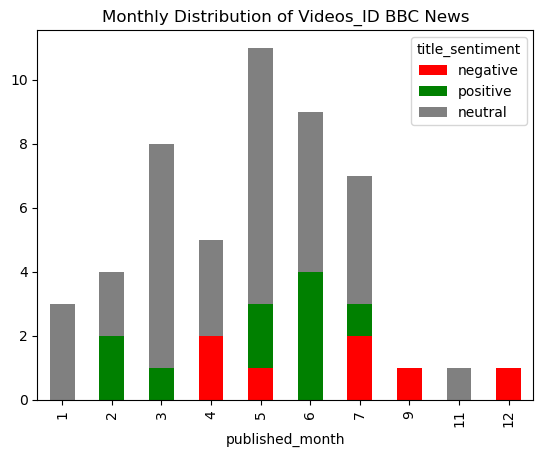

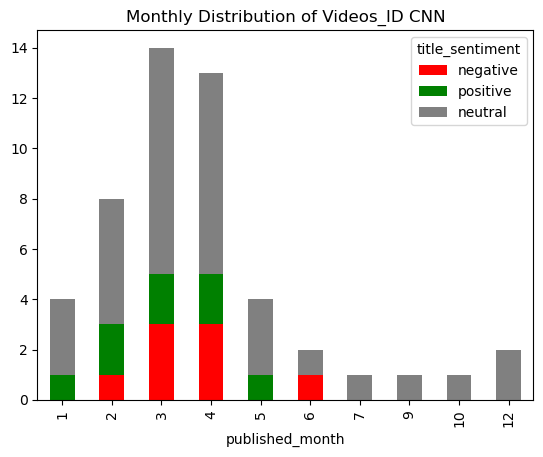

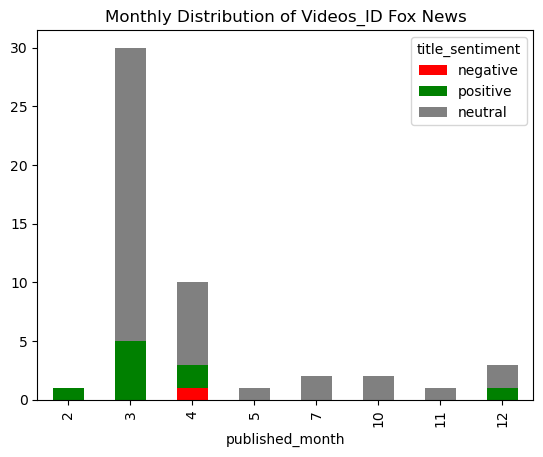

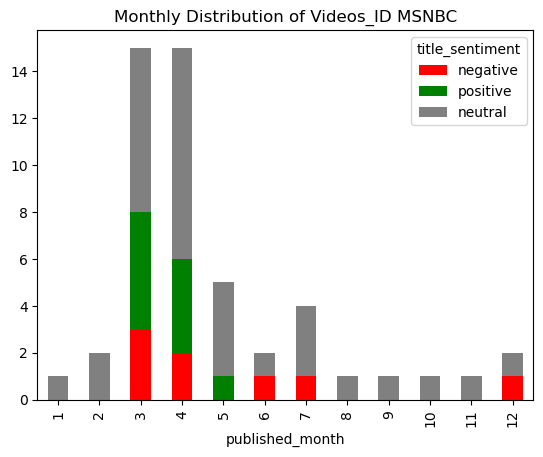

In [30]:
# Plotting the stacked bar chart
plt.figure(figsize=(100, 60))

unique_channels = video_sentimental.channel_title.unique()

for channels in unique_channels:
    
    # Sort the data by channel_title and comment_month
    draw_data = video_sentimental.sort_values(['channel_title', 'published_month'])
    draw_data = draw_data[draw_data['channel_title'] == channels].reset_index(drop = True)[['published_month','negative','positive','neutral']]
    draw_data.set_index('published_month').plot(kind='bar', stacked=True,
                                                color=['red', 'green', 'gray'])  # Set colors for negative, positive, and neutral respectively

    plt.title(f'Monthly Distribution of Videos_ID {channels}')

<Figure size 10000x6000 with 0 Axes>

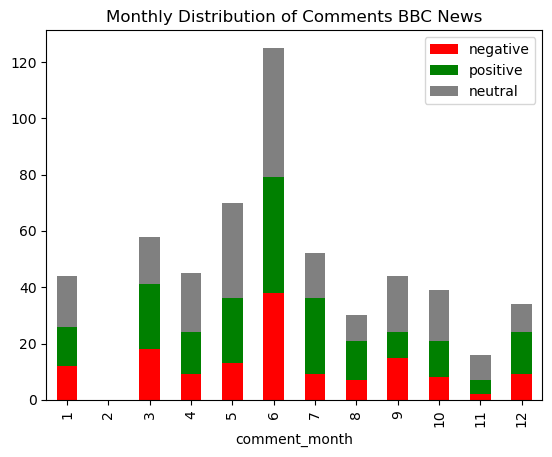

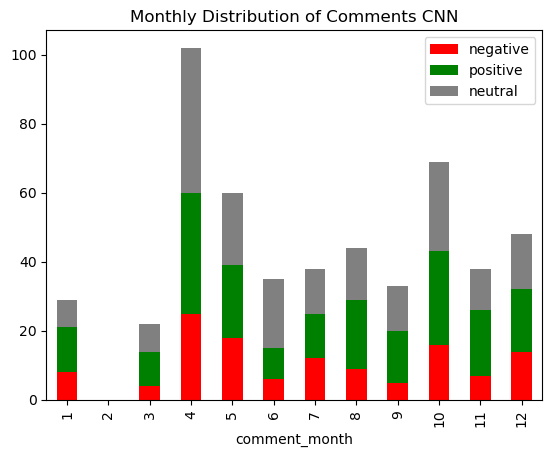

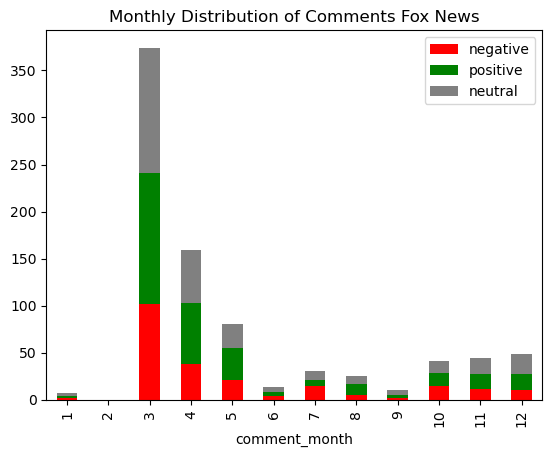

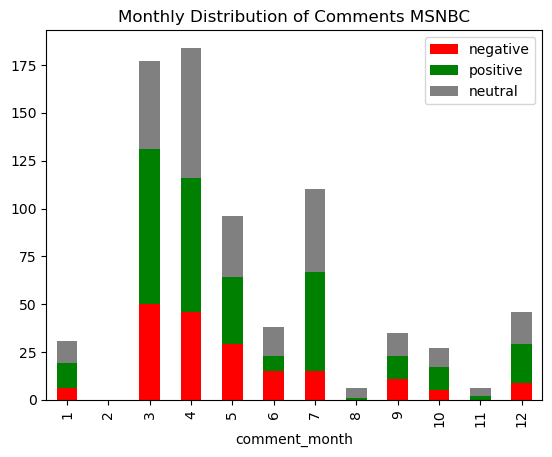

In [14]:

# Plotting the stacked bar chart
plt.figure(figsize=(100, 60))

unique_channels = comment_sentimental.channel_title.unique()

for channels in unique_channels:
    
    # Sort the data by channel_title and comment_month
    draw_data = comment_sentimental.sort_values(['channel_title', 'comment_month'])
    draw_data = draw_data[draw_data['channel_title'] == channels].reset_index(drop = True)[['comment_month','negative','positive','neutral']]
    draw_data.set_index('comment_month').plot(kind='bar', stacked=True,
                                                color=['red', 'green', 'gray']) 
    plt.title(f'Monthly Distribution of Comments {channels}')
